In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
# Step 1 - Load data
data = pd.read_csv('weight-height.csv',header=0)

#Analyze Data
print('data info:')
data.info()
print('\ndata describe:\n',data.describe())
print('\ndata is_null:\n',data.isnull().sum())

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB

data describe:
              Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

data is_null:
 Gender    0
Height    0
Weight    0
dtype: int64


In [9]:
# Step 3 - Convert Gender to number 
# Replace directly in dataframe
data['Gender'].replace('Female',0, inplace=True)
data['Gender'].replace('Male',1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f61fec950>,
      dtype=object)

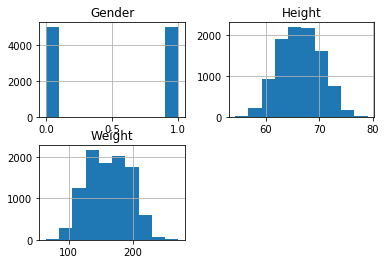

In [14]:
data.hist()

In [10]:
# Step 4 - Split data
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1].values,
                                                    data.iloc[:, 2].values,
                                                    test_size=0.2,
                                                    random_state=0)

In [16]:
# Step 5 - creates and Fit linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('linear regression parameters: ',lin_reg.coef_ )
print('linear regression score on train: ', lin_reg.score(X_train, y_train))
print('linear regression score on test: ', lin_reg.score(X_test, y_test))

linear regression parameters:  [19.42381689  5.96260976]
linear regression score on train:  0.9021035919691243
linear regression score on test:  0.9052889824534558


In [17]:
# Step 6 - Make Prediction using test data
lin_pred = lin_reg.predict(X_test)

# Step 7 - Model Accuracy
print('R square = ',metrics.r2_score(y_test, lin_pred))
print('Mean squared Error = ',metrics.mean_squared_error(y_test, lin_pred))
print('Mean absolute Error = ',metrics.mean_absolute_error(y_test, lin_pred))

R square =  0.9052889824534558
Mean squared Error =  97.87152220196161
Mean absolute Error =  7.955916525326745


In [18]:
# Step 8 - Predict my weight
my_weight_pred = lin_reg.predict([[1,74]])[0]
print('My predicted weight = ',my_weight_pred)

My predicted weight =  216.67200869430846
